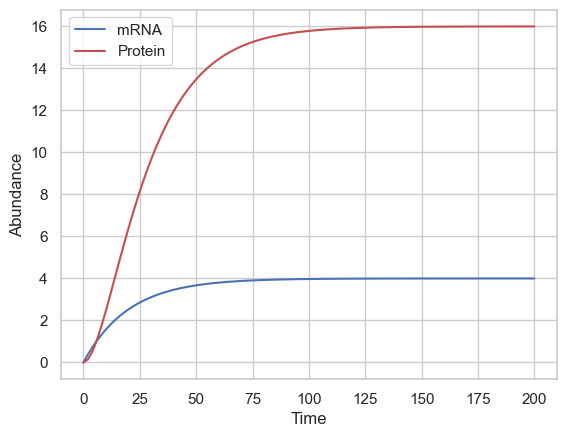

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns

sns.set_theme(style="whitegrid")


y0 = [0,0] # no mRNA no protein initial condition

t = np.linspace(0,200, num=100)

k_m=0.2
gamma_m = 0.05
# degradation should be less than production
k_p=0.4
gamma_p=0.1

params=[k_m,gamma_m,k_p,gamma_p]

def sim(variables, t, params):
    m=variables[0]
    p=variables[1]

    k_m= params[0]
    gamma_m= params[1]
    k_p= params[2]
    gamma_p= params[3]

    dmdt =k_m - gamma_m*m
    dpdt =k_p*m - gamma_p*p

    return([dmdt, dpdt])

y =  odeint(sim, y0, t, args=(params,))

f,ax = plt.subplots(1)

line1, =ax.plot(t,y[:,0], color='b', label='mRNA')
line2, =ax.plot(t,y[:,1], color='r', label='Protein')

ax.set_ylabel("Abundance")
ax.set_xlabel("Time")

ax.legend(handles=[line1, line2])

plt.show()
# print(y)

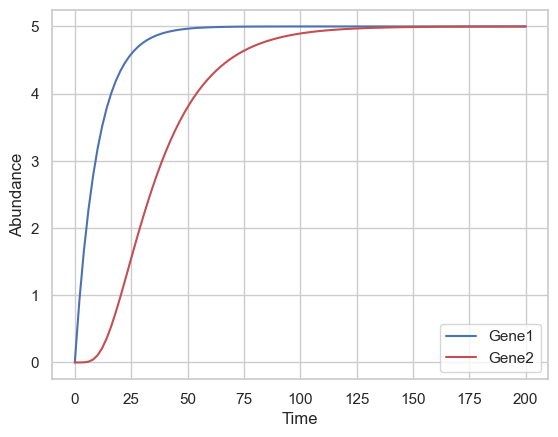

In [32]:
# two gene model: activation
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid")

y0= [0,0]

t= np.linspace(0,200, num=100)

k_1 =0.5
gamma_1=0.1
k_2 = 0.5
gamma_2=0.05

n=5
c=5

params=[k_1,gamma_1, k_2, gamma_2, n, c]

def sim(variables, t, params):
    G1 = variables[0]
    G2 = variables[1]

    k_1= params[0]
    gamma_1=params[1]
    k_2= params[2]
    gamma_2=params[3]
    n= params[4]
    c= params[5]

    dG1dt = k_1 - gamma_1*G1
    dG2dt = ((G1**n)/(c**n + G1**n))*k_2 - gamma_2*G2
    return([dG1dt,dG2dt])

y= odeint(sim, y0,t, args=(params,))

f,ax = plt.subplots(1)

line1, =ax.plot(t,y[:,0], color='b', label='Gene1')
line2, =ax.plot(t,y[:,1], color='r', label='Gene2')

ax.set_ylabel("Abundance")
ax.set_xlabel("Time")

ax.legend(handles=[line1, line2])

plt.show()

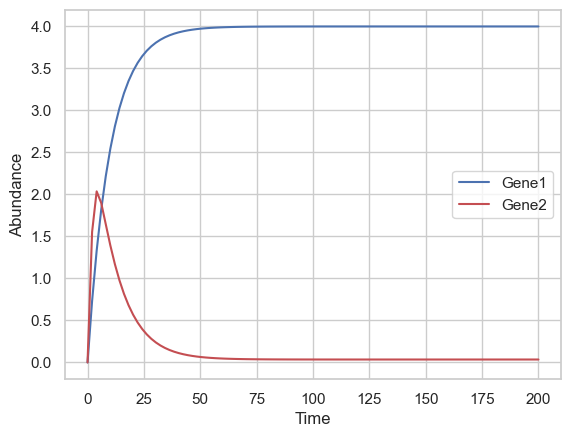

In [33]:
# two gene model: repression

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns

sns.set_theme(style="whitegrid")

y0=[0,0]

t=np.linspace(0,200,num=100)

k_1=0.4
gamma_1= 0.1
k_2=0.9
gamma_2= 0.1
c=1
n=4

params=[k_1, gamma_1, k_2,gamma_2, c,n]

def sim(variables, t, params):
    G1= variables[0]
    G2= variables[1]

    k_1=params[0]
    gamma_1=params[1]
    k_2=params[2]
    gamma_2=params[3]
    c=params[4]
    n=params[5]

    dg1dt = k_1-gamma_1*G1
    dg2dt = (c**n/(c**n+G1**n))*k_2 - gamma_2*G2

    return[dg1dt,dg2dt]

y= odeint(sim, y0,t, args=(params,))

f,ax = plt.subplots(1)

line1, =ax.plot(t,y[:,0], color='b', label='Gene1')
line2, =ax.plot(t,y[:,1], color='r', label='Gene2')

ax.set_ylabel("Abundance")
ax.set_xlabel("Time")

ax.legend(handles=[line1, line2])

plt.show()

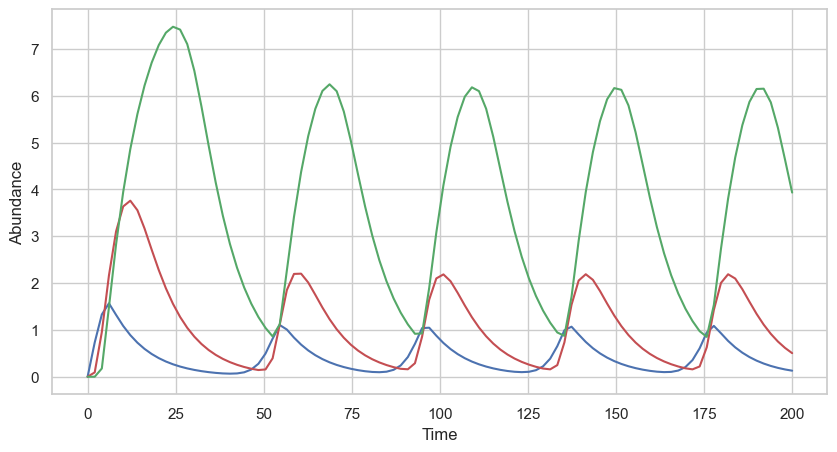

In [35]:
# three gene model: negative feedback oscillator

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns

sns.set_theme(style="whitegrid")

y0=[0,0,0]
t= np.linspace(0,200, num=100)

k_1=0.4
gamma_1= 0.1
k_2=0.9
gamma_2= 0.1
k_3=0.9
gamma_3= 0.1
c=1
n=4

params= [k_1,gamma_1, k_2, gamma_2, k_3, gamma_3, c, n]
def simulate(variables, t, params):
    G1= variables[0]
    G2= variables[1]
    G3= variables[2]


    k_1=params[0]
    gamma_1=params[1]
    k_2=params[2]
    gamma_2=params[3]
    k_3=params[4]
    gamma_3=params[5]
    c=params[6]
    n=params[7]

    dg1dt=((c**n)/(c**n+G3**n))*k_1 - gamma_1*G1
    dg2dt=((G1**n)/(c**n+G1**n))*k_2 - gamma_2*G2
    dg3dt=((G2**n)/(c**n+G2**n))*k_3 - gamma_3*G3

    return[dg1dt,dg2dt,dg3dt]

y= odeint(simulate, y0, t, args=(params,))

plt.figure(figsize=(10,5))

plt.plot(t,y[:,0], color='b', label='Gene1')
plt.plot(t,y[:,1], color='r', label='Gene2')
plt.plot(t,y[:,2], color='g', label='Gene3')
plt.ylabel("Abundance")
plt.xlabel("Time")


plt.show()

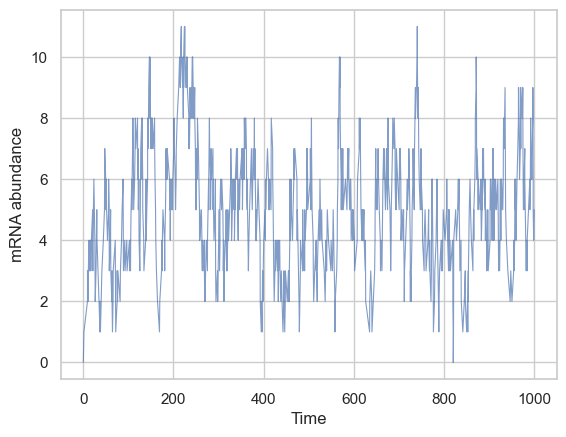

In [70]:
# stochastic simulation algorithm
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

sns.set_theme(style="whitegrid")


X=[0]
t=[0]

tend = 1000

k=0.5
gamma=0.1

while t[-1]< tend:
    current_X=X[-1]

    rates=[k, gamma*current_X]
    rate_sum =sum(rates)
    tau = np.random.exponential(scale=1/rate_sum) #1/lambda is also the mean
    t.append(t[-1]+tau)

    rand = random.uniform(0,1)
# production event
    if rand*rate_sum>0 and rand*rate_sum<rates[0]:
        X.append(X[-1]+1)
# decay event
    elif rand*rate_sum> rates[0] and rand*rate_sum< rates[0]+rates[1]:
        X.append(X[-1]-1)

plt.plot(t,X, alpha=0.7, lw=0.8)
plt.xlabel("Time")
plt.ylabel("mRNA abundance")
plt.show()

